In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the datasets using pandas dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
# Checking if dataset is balanced
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [3]:
# Checking the number of observations and features
df.shape

(768, 9)

In [4]:
# Checking for null values in the dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Checking for duplicated values in the dataset
df.duplicated().sum()

0

In [70]:
# Splitting the dataset into input(X) and output(y)
X = df.drop('Outcome', axis=1)
y = df.Outcome

In [71]:
# checking out the first two records in our dataset
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [72]:
# checking out the first two outcomes
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [60]:
# checking for imbalance in the dataset outcome. yes! it is indeed imbalanced.
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [80]:
# By using the SMOTE approach, lets import SMOTE to adjust the imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X,y)

In [82]:
# The outcome set is now balanced and we can proceed with other preprocessing before modelling
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [8]:
# importing scalers for our features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [81]:
# lets scale X to be fit for modelling
X = scaler.fit_transform(X)
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.67336683, 0.56557377, ..., 0.52719442, 0.19778074,
        0.11666667],
       [0.41176471, 0.88442211, 0.7295082 , ..., 0.50564486, 0.16008846,
        0.58333333],
       [0.29411765, 0.81909548, 0.52459016, ..., 0.47304839, 0.07340671,
        0.28333333]])

In [17]:
# importing models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [18]:
# HyperParameter tuning and best performing model selection
model_params = {
    'svm':{
        'model': SVC(gamma = 'auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf', 'linear']
        }
    },
    'Random Forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'Logistic Regression':{
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10],
            'max_iter': [100, 1000, 2500, 5000],
            'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
        }
    },
    'Naive Bayes Gaussian': {
        'model': GaussianNB(),
        'params':{
            'var_smoothing': np.logspace(0,-9, num=100)
        }
    },
    'Naive Bayes Multinomial': {
        'model': MultinomialNB(),
        'params': {}
        
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'min_samples_leaf': [1,3,5],
            'criterion':['gini','entropy']
        }
    } 
    
}

In [92]:
# RandomForestClassifier topped the list of best models followed by SVM classifier. We shall use the two.

scores_rs = []

for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X,y)
    scores_rs.append({
        'model': model_name,
        'best score': clf.best_score_,
        'best params': clf.best_params_
    })
df_rs = pd.DataFrame(scores_rs, columns=['model', 'best score', 'best params'])
df_rs

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,model,best score,best params
0,svm,0.766,"{'kernel': 'rbf', 'C': 20}"
1,Random Forest,0.791,{'n_estimators': 10}
2,Logistic Regression,0.753,"{'solver': 'saga', 'max_iter': 100, 'C': 10}"
3,Naive Bayes Gaussian,0.737,{'var_smoothing': 3.511191734215127e-05}
4,Naive Bayes Multinomial,0.645,{}
5,Decision Tree,0.764,"{'min_samples_leaf': 1, 'criterion': 'entropy'}"


In [83]:
# Splitting to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
X_train.shape, X_test.shape

((800, 8), (200, 8))

In [84]:
y_train.value_counts(), y_test.value_counts()

(1    400
 0    400
 Name: Outcome, dtype: int64,
 1    100
 0    100
 Name: Outcome, dtype: int64)

In [85]:
# using SVM classifer
model = SVC(kernel='rbf', C=20)
model.fit(X_train, y_train)

SVC(C=20)

In [86]:
predictions = model.predict(X_test)
# first 10 predictions
predictions[:10]

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [87]:
# First 10 true values
np.array(y_test[:10])

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [88]:
# Model % Performance
model.score(X_test, y_test)

0.825

In [101]:
# Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions)
cm

array([[81, 19],
       [16, 84]], dtype=int64)

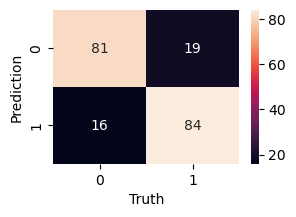

In [102]:
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

In [91]:
# F1 Score of 82% and 83% for both classes of of outcomes are good
rpt = classification_report(y_test, predictions)
print(rpt)

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       100
           1       0.82      0.84      0.83       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [106]:
# using RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
# Model %performance
model_rf.score(X_test, y_test)

0.83

In [109]:
predictions_rf = model_rf.predict(X_test)
# first 10 predictions
predictions_rf[:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [110]:
# First 10 true values
np.array(y_test[:10])

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [108]:
# Plotting Confusion Matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
cm_rf

array([[81, 19],
       [14, 86]], dtype=int64)

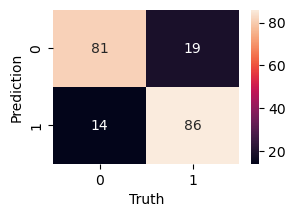

In [111]:
plt.figure(figsize=(3,2))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()